FIFA 2020 Players Analytics

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('./players_20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
cols = []
for col in df.columns:
    cols.append(col)
print(cols)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

Columns of No use:

'sofifa_id', 'player_url', 'long_name', 'real_face','goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'

Removing Unnecessary Columns

In [5]:
toDrop = ['sofifa_id', 'player_url', 'long_name', 'real_face','goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

df.drop(toDrop, axis='columns', inplace=True)
df.columns

Index(['short_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality',
       'club', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reaction

Checking for null values in the data

In [6]:
df.isnull().sum()

short_name                   0
age                          0
dob                          0
height_cm                    0
weight_kg                    0
                            ..
mentality_penalties          0
mentality_composure          0
defending_marking            0
defending_standing_tackle    0
defending_sliding_tackle     0
Length: 69, dtype: int64

Describing Data

In [7]:
df.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,...,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631
std,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,...,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734
min,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,...,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000
25%,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.000000,55.000000,52.000000
75%,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,92.000000,90.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   dob                         18278 non-null  object 
 3   height_cm                   18278 non-null  int64  
 4   weight_kg                   18278 non-null  int64  
 5   nationality                 18278 non-null  object 
 6   club                        18278 non-null  object 
 7   overall                     18278 non-null  int64  
 8   potential                   18278 non-null  int64  
 9   value_eur                   18278 non-null  int64  
 10  wage_eur                    18278 non-null  int64  
 11  player_positions            18278 non-null  object 
 12  preferred_foot              18278 non-null  object 
 13  international_reputation    182

C:\Users\1992729\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pace'>

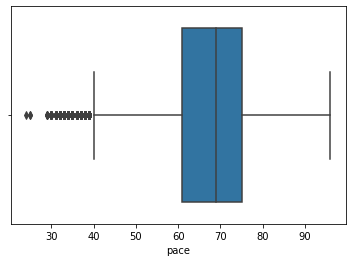

In [9]:
#boxplot of pace without cleaning
import seaborn as sns

sns.boxplot(df['pace'])

Filling Null Values

In [10]:
#there are multiple null values in pace column so filling those null values with Mean
df['pace'] = df['pace'].fillna(df['pace'].mean())


In [11]:
df['pace'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18278 entries, 0 to 18277
Series name: pace
Non-Null Count  Dtype  
--------------  -----  
18278 non-null  float64
dtypes: float64(1)
memory usage: 142.9 KB


C:\Users\1992729\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pace'>

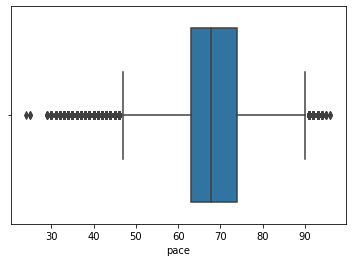

In [12]:
#boxplot of pace after cleaning
sns.boxplot(df['pace'])

In [13]:
#filling null values in shooting with average shooting ratings
df['shooting'] = df['shooting'].fillna(df['shooting'].mean())
df['shooting'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18278 entries, 0 to 18277
Series name: shooting
Non-Null Count  Dtype  
--------------  -----  
18278 non-null  float64
dtypes: float64(1)
memory usage: 142.9 KB


C:\Users\1992729\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='passing'>

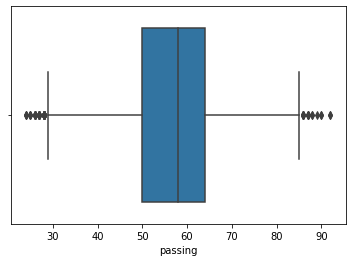

In [14]:
#box plot of passing before cleaning
sns.boxplot(df['passing']) 

In [15]:
#replacing null values with median in passing column
df['passing'] = df['passing'].fillna(df['passing'].median())
df['passing'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 18278 entries, 0 to 18277
Series name: passing
Non-Null Count  Dtype  
--------------  -----  
18278 non-null  float64
dtypes: float64(1)
memory usage: 142.9 KB


C:\Users\1992729\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='passing'>

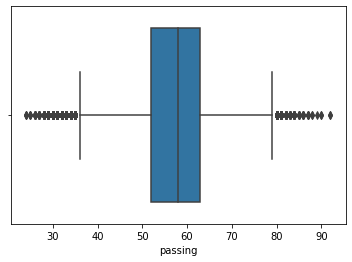

In [16]:
#boxplot after cleaning data
sns.boxplot(df['passing'])

C:\Users\1992729\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dribbling'>

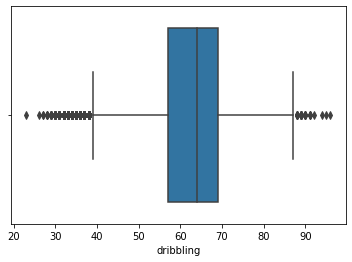

In [17]:
#boxplot of dribbling before cleaning
sns.boxplot(df['dribbling'])

In [18]:
#box plot of dribbling after cleaning
df['dribbling'] = df['dribbling'].fillna(df['dribbling'].mean())
df['dribbling'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18278 entries, 0 to 18277
Series name: dribbling
Non-Null Count  Dtype  
--------------  -----  
18278 non-null  float64
dtypes: float64(1)
memory usage: 142.9 KB


C:\Users\1992729\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dribbling'>

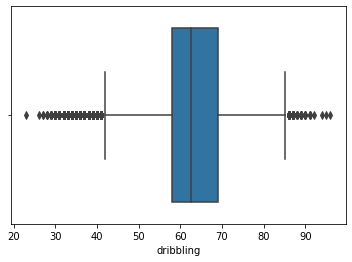

In [19]:
#boxplot after cleaning
sns.boxplot(df['dribbling'])

In [20]:
#filling na values in physic
df['physic'] = df['physic'].fillna(df['physic'].mean())
df['physic'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 18278 entries, 0 to 18277
Series name: physic
Non-Null Count  Dtype  
--------------  -----  
18278 non-null  float64
dtypes: float64(1)
memory usage: 142.9 KB


In [21]:
#filling na values in defending
df['defending'] = df['defending'].fillna(df['defending'].mean())

Top 5 Players Based On Overall Ratings

In [22]:
df.nlargest(5, 'overall')

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,...,94,48,40,94,94,75,96,33,37,26
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,...,93,63,29,95,82,85,95,28,32,24
2,Neymar Jr,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,...,84,51,36,87,90,90,94,27,26,29
3,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,...,12,34,19,11,65,11,68,27,12,18
4,E. Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,...,80,54,41,87,89,88,91,34,27,22


Top 5 Players Based On Potential

In [23]:
df.nlargest(5, 'potential')

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
10,K. Mbappé,20,1998-12-20,178,73,France,Paris Saint-Germain,89,95,93500000,...,79,62,38,89,80,70,84,34,34,32
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,...,94,48,40,94,94,75,96,33,37,26
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,...,93,63,29,95,82,85,95,28,32,24
3,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,...,12,34,19,11,65,11,68,27,12,18
6,M. ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,...,10,43,22,11,70,25,70,25,13,10


In [24]:
df['dob'].dtype

dtype('O')

Data type of Date of Birth is object, so we need to change it to date

In [25]:
df['dob'] = pd.to_datetime(df['dob'])
df['dob'].dtype

dtype('<M8[ns]')

Top 5 Players Based On  Dribbling Skills

In [26]:
df.nlargest(5, 'dribbling')

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,...,94,48,40,94,94,75,96,33,37,26
2,Neymar Jr,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,...,84,51,36,87,90,90,94,27,26,29
4,E. Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,...,80,54,41,87,89,88,91,34,27,22
41,Bernardo Silva,24,1994-08-10,173,64,Portugal,Manchester City,87,90,64000000,...,75,69,49,85,85,68,87,49,59,40
48,D. Mertens,32,1987-05-06,169,61,Belgium,Napoli,87,87,40000000,...,81,59,36,87,83,79,81,25,40,40


Top 5 Defenders

In [27]:
df.nlargest(5, 'defending')

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
7,V. van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,90,91,78000000,...,64,82,89,47,65,62,89,91,92,85
16,G. Chiellini,34,1984-08-14,187,85,Italy,Juventus,89,89,24500000,...,49,91,88,28,50,50,84,94,91,89
11,K. Koulibaly,28,1991-06-20,187,89,Senegal,Napoli,89,91,67500000,...,15,87,88,35,52,33,82,91,90,87
35,D. Godín,33,1986-02-16,187,78,Uruguay,Inter,88,88,28000000,...,43,88,87,48,52,50,82,90,89,87
49,M. Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,87,87,41000000,...,51,71,89,56,79,68,89,90,89,86


5 Highest Paid Players 

In [28]:
df.nlargest(5, 'value_eur')

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
2,Neymar Jr,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,...,84,51,36,87,90,90,94,27,26,29
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,...,94,48,40,94,94,75,96,33,37,26
10,K. Mbappé,20,1998-12-20,178,73,France,Paris Saint-Germain,89,95,93500000,...,79,62,38,89,80,70,84,34,34,32
4,E. Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,...,80,54,41,87,89,88,91,34,27,22
5,K. De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,91,91,90000000,...,90,76,61,88,94,79,91,68,58,51


What is the average age of players in dataset?

In [29]:
print("Average age of players: ", round(df['age'].mean(),2))

Average age of players:  25.28


Distplot For Age

Text(0.5, 1.0, 'Age Distribution of Players')

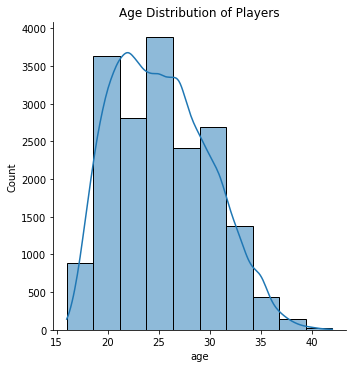

In [31]:
sns.displot(df['age'], bins=10, kde=True)
plt.title("Age Distribution of Players")

Players with maximum age

In [32]:
df[df['age'] == df['age'].max()]

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
11832,C. Muñoz,42,1977-07-01,177,73,Argentina,CD Universidad de Concepción,64,64,50000,...,20,35,25,16,45,24,62,18,14,19
13003,H. Sulaimani,42,1977-01-21,173,70,Saudi Arabia,Al Ahli,63,63,0,...,63,92,65,64,68,60,66,62,66,63


What is the minimum age of players?

In [33]:
print("Minimum age of players: ", df['age'].min())

Minimum age of players:  16


Players with minimum age

In [34]:
df[df['age'] == df['age'].min()][:5]

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
4764,A. Hložek,16,2002-07-25,185,80,Czech Republic,Sparta Praha,70,86,3500000,...,68,69,26,68,68,61,69,25,24,23
6630,Fábio Silva,16,2002-07-19,185,75,Portugal,FC Porto,68,85,1800000,...,64,54,17,67,56,70,61,16,21,16
12158,E. Millot,16,2002-07-17,175,65,France,AS Monaco,63,86,800000,...,52,57,53,59,62,58,65,48,52,47
12160,S. Esposito,16,2002-07-02,186,75,Italy,Inter,63,85,825000,...,62,31,20,65,56,64,45,23,21,20
14626,A. Velasco,16,2002-07-27,167,63,Argentina,Independiente,60,83,450000,...,47,64,48,58,49,47,47,43,46,57


What is the average height of players?

In [35]:
print("Average Height Of Players: ", round(df['height_cm'].mean(),2))

Average Height Of Players:  181.36


Distplot for height

Text(0.5, 1.0, 'Distribution of height')

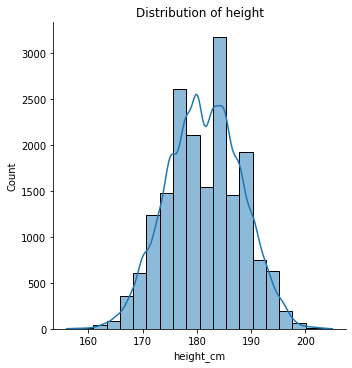

In [36]:
sns.displot(df['height_cm'], kde=True, bins=20)
plt.title("Distribution of height")

What is the average weight of players?

In [37]:
print("Average Weight Of Players: ", round(df['weight_kg'].mean(),2))

Average Weight Of Players:  75.28


Distplot for weight

Text(0.5, 1.0, 'Distribution Of Weight')

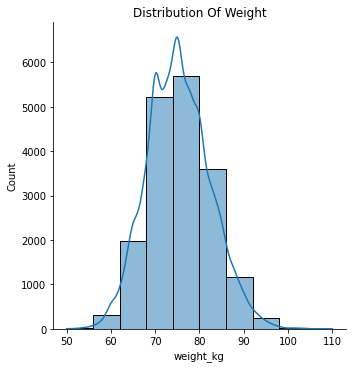

In [38]:
sns.displot(df['weight_kg'], kde=True, bins=10)
plt.title("Distribution Of Weight")

Top 5 Nationalities

Text(0.5, 1.0, 'Top 5 Nations')

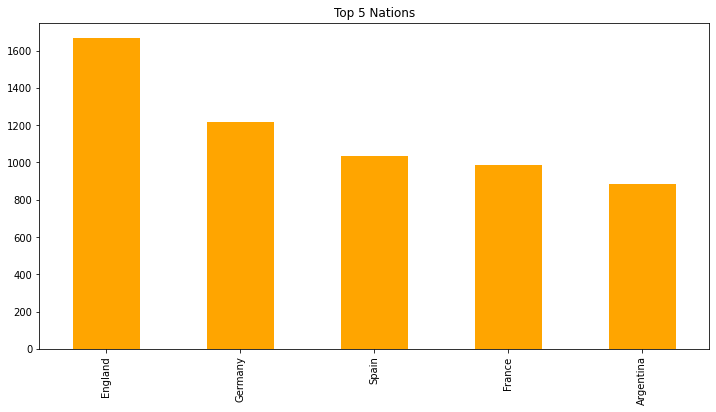

In [39]:
df['nationality'].value_counts()[:5].plot(kind='bar', figsize=(12,6), color = 'orange')
plt.title("Top 5 Nations")

Top 5 Clubs

Text(0.5, 1.0, 'Top 5 Clubs')

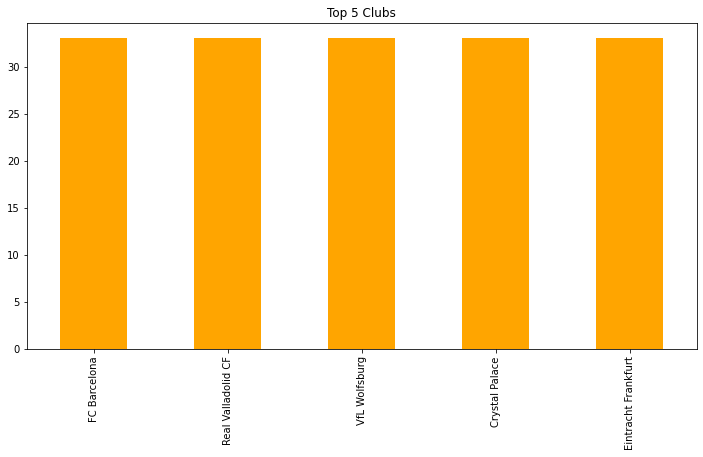

In [40]:
df['club'].value_counts()[:5].plot(kind='bar', figsize=(12,6), color = 'orange')
plt.title("Top 5 Clubs")

In [41]:
df.columns

Index(['short_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality',
       'club', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reaction

Which foot is preferred more?

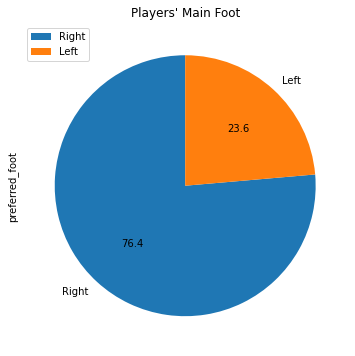

In [42]:
df['preferred_foot'].value_counts().plot(kind='pie', figsize=(10,6), autopct="%.1f", startangle=90)
plt.title("Players' Main Foot")
plt.legend()

Who is the best right foot player in the dataset?

In [43]:
df[df['preferred_foot'] == 'Right'].sort_values(by='overall', ascending=False)[:1]

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,...,93,63,29,95,82,85,95,28,32,24


Who is the best right foot defender in the dataset?

In [112]:
df[(df['preferred_foot'] == 'Right') & (df['player_positions'] == 'CB')].sort_values(by='overall', ascending=False)[:1]

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
7,V. van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,90,91,78000000,...,64,82,89,47,65,62,89,91,92,85


Who is the best right foot goal keeper in the dataset?

In [44]:
df[(df['preferred_foot'] == 'Right') & (df['player_positions'] == 'GK')].sort_values(by='overall', ascending=False)[:1]

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
3,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,...,12,34,19,11,65,11,68,27,12,18


Who is the best left foot player in the dataset?

In [108]:
df[df['preferred_foot'] == 'Left'].sort_values(by='overall', ascending=False)[:1]

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,...,94,48,40,94,94,75,96,33,37,26


Who is the best left foot defender in the dataset?

In [46]:
df[(df['preferred_foot'] == 'Left') & (df['player_positions'] == 'CB')].sort_values(by='overall', ascending=False)[:1]

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
16,G. Chiellini,34,1984-08-14,187,85,Italy,Juventus,89,89,24500000,...,49,91,88,28,50,50,84,94,91,89


Who is the best left foot GK in the dataset?

In [47]:
df[(df['preferred_foot'] == 'Left') & (df['player_positions'] == 'GK')].sort_values(by='overall', ascending=False)[:1]

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
25,Ederson,25,1993-08-17,188,86,Brazil,Manchester City,88,91,54500000,...,18,38,27,20,70,17,70,29,15,8


Are there any indian players in the dataset?

In [109]:
df[df['nationality'] == 'India']

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
12155,G. Chatterjee,33,1985-07-04,195,84,India,India,64,64,0,...,13,40,26,16,15,25,21,18,7,9
13102,P. Bhatt,34,1985-04-07,182,78,India,India,63,63,0,...,58,63,25,61,57,65,68,12,37,37
13103,B. Raj,31,1988-03-25,175,69,India,India,63,63,0,...,57,73,58,50,51,42,61,60,59,61
13970,A. Chakraborty,33,1985-10-27,189,79,India,India,62,62,0,...,42,61,62,29,44,30,55,61,58,60
13971,H. Bhandari,30,1989-06-22,178,74,India,India,62,62,0,...,49,69,41,59,57,59,52,26,44,41
13972,A. Swaminathan,27,1991-10-29,173,65,India,India,62,62,0,...,51,31,29,61,63,43,56,28,25,27
14625,D. Pillai,31,1988-06-22,178,70,India,India,61,61,0,...,53,61,57,57,60,40,69,30,50,51
15204,A. Ginti,25,1993-08-10,170,69,India,India,60,62,0,...,38,56,54,61,54,50,55,57,59,58
15205,A. Khurana,26,1993-04-21,186,81,India,India,60,62,0,...,37,64,59,27,34,36,53,58,58,55
15321,A. Deshpande,38,1980-12-17,180,76,India,India,60,60,0,...,57,38,55,60,64,57,64,40,26,15


In [48]:
groupedDf = df.groupby(by = ['age', 'overall'])['age'].count().unstack()
groupedDf.fillna(df['overall'].mean())

overall,48,49,50,51,52,53,54,55,56,57,...,85,86,87,88,89,90,91,92,93,94
age,,,,,,,,,,,,,,,,,,,,,
16,2.000000,1.000000,66.244994,1.000000,2.000000,1.000000,66.244994,66.244994,66.244994,66.244994,...,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994
17,8.000000,13.000000,13.000000,16.000000,26.000000,17.000000,17.000000,14.000000,10.000000,14.000000,...,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994
18,14.000000,18.000000,28.000000,41.000000,42.000000,46.000000,45.000000,41.000000,40.000000,18.000000,...,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994
19,9.000000,10.000000,18.000000,32.000000,33.000000,42.000000,65.000000,53.000000,65.000000,55.000000,...,1.000000,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994
20,3.000000,7.000000,16.000000,12.000000,28.000000,33.000000,34.000000,55.000000,79.000000,77.000000,...,1.000000,66.244994,66.244994,66.244994,1.000000,66.244994,66.244994,66.244994,66.244994,66.244994
21,4.000000,8.000000,7.000000,10.000000,12.000000,23.000000,27.000000,41.000000,42.000000,56.000000,...,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994
22,2.000000,3.000000,11.000000,1.000000,14.000000,16.000000,18.000000,28.000000,43.000000,49.000000,...,1.000000,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994
23,66.244994,3.000000,3.000000,1.000000,3.000000,5.000000,10.000000,15.000000,18.000000,31.000000,...,2.000000,1.000000,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994
24,66.244994,66.244994,2.000000,66.244994,3.000000,5.000000,6.000000,8.000000,27.000000,17.000000,...,5.000000,2.000000,1.000000,1.000000,66.244994,66.244994,66.244994,66.244994,66.244994,66.244994


Text(0.5, 1.0, 'Age By Overall')

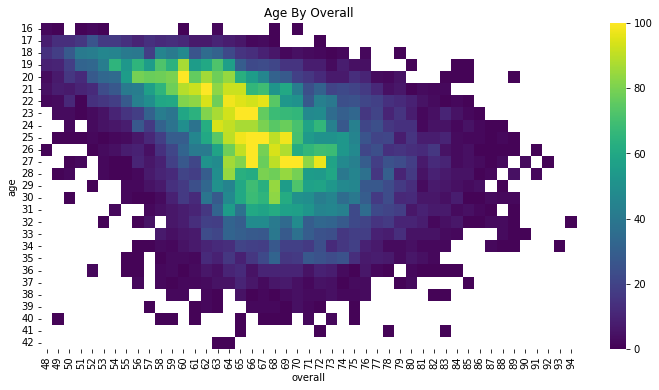

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(groupedDf, cmap='viridis', vmin=0, vmax=100)
plt.title("Age By Overall")

Checking correlations between weight and other parameters

In [51]:
print("Correlation between weight and agility: " , round(df['weight_kg'].corr(df['movement_agility']),2))

print("Correlation between weight and sprint speed: " , round(df['weight_kg'].corr(df['movement_sprint_speed']),2))

print("Correlation between weight and Dribbling: " , round(df['weight_kg'].corr(df['dribbling']),2))

print("Correlation between weight and Defending: " , round(df['weight_kg'].corr(df['defending']),2))

print("Correlation between weight and pace: " , round(df['weight_kg'].corr(df['pace']),2))


Correlation between weight and agility:  -0.55
Correlation between weight and sprint speed:  -0.42
Correlation between weight and Dribbling:  -0.27
Correlation between weight and Defending:  0.2
Correlation between weight and pace:  -0.35


In [54]:
print("Correlation between physic and defending: ", round(df['physic'].corr(df['defending']),2))
#print("Correlation between physic and pace: ", round(df['physic'].corr(df['pace']),2))

Correlation between physic and defending:  0.55


Scatterplot on Value By Overall based on Age

Text(0.5, 1.0, 'Age By Overall')

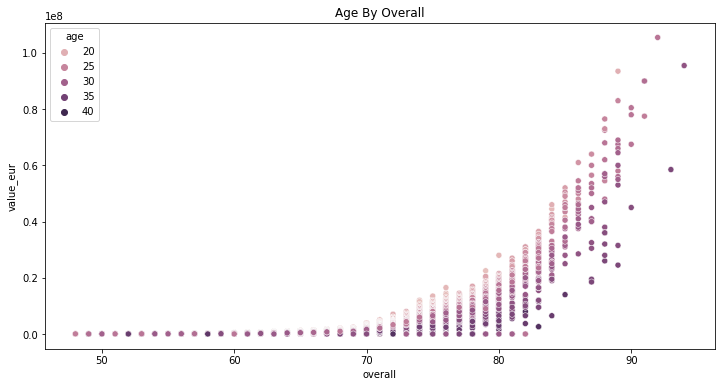

In [111]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='overall', y='value_eur', data=df, hue='age')
plt.title("Age By Overall")

Scatterplot on Nationality and Overall

Text(0.5, 1.0, 'Nationality By Overall')

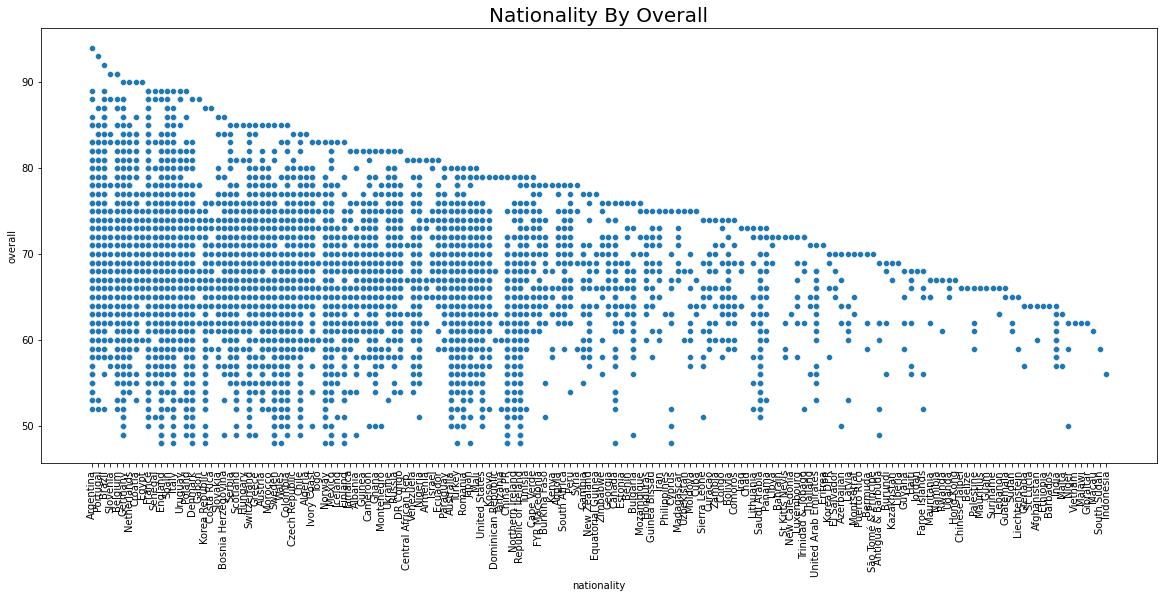

In [129]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='nationality', y='overall', data=df)
plt.xticks(rotation=90)
plt.title("Nationality By Overall", fontsize=20)

Text(0.5, 1.0, 'Age By Weight')

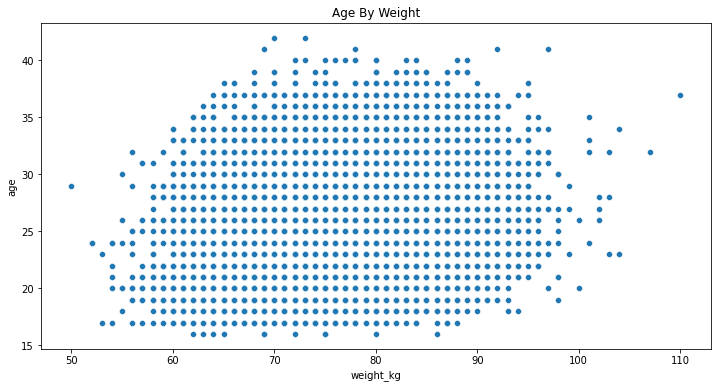

In [64]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='weight_kg', y='age', data=df)
plt.title("Age By Weight")

Changing data type of contract valid until column to integer

In [65]:
df['contract_valid_until'] = df['contract_valid_until'].fillna(float(2021))
df['contract_valid_until'] = df['contract_valid_until'].astype("int")

FC Barcelona players with contract expiring in 2021

In [66]:
year = 2021

df[(df['club'] == 'FC Barcelona') & (df['contract_valid_until'] == 2021)]

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,...,94,48,40,94,94,75,96,33,37,26
19,L. Suárez,32,1987-01-24,182,86,Uruguay,FC Barcelona,89,89,53000000,...,86,87,41,92,82,83,85,57,45,38
64,I. Rakitić,31,1988-03-10,184,78,Croatia,FC Barcelona,86,86,38000000,...,85,67,79,77,85,82,80,76,73,72
142,A. Vidal,32,1987-05-22,180,75,Chile,FC Barcelona,84,84,23500000,...,82,93,85,83,82,81,83,82,87,88
4042,Riqui Puig,19,1999-08-13,169,56,Spain,FC Barcelona,71,87,5000000,...,54,54,55,55,78,55,75,53,57,53
6634,Abel Ruiz,19,2000-01-28,182,73,Spain,FC Barcelona,68,84,1900000,...,67,46,19,67,63,64,57,45,38,20
7711,Oriol Busquets,20,1999-06-20,185,77,Spain,FC Barcelona,67,82,1600000,...,47,61,65,41,66,42,70,64,63,61
7713,Miranda,19,2000-01-19,185,76,Spain,FC Barcelona,67,82,1500000,...,37,57,66,62,48,44,59,65,68,67
9938,Álex Collado,20,1999-04-22,177,66,Spain,FC Barcelona,65,80,1200000,...,63,48,49,60,69,63,67,54,55,56
9970,Jorge Cuenca,19,1999-11-17,189,76,Spain,FC Barcelona,65,78,950000,...,36,67,66,21,45,44,57,62,66,63


Youngest Players in FC Barcelona

In [67]:
df[(df['club'] == 'FC Barcelona')].sort_values(by='age', ascending=True)[:5]

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
4045,J. Todibo,19,1999-12-30,190,81,France,FC Barcelona,71,86,4800000,...,41,72,68,41,50,46,72,62,70,68
9970,Jorge Cuenca,19,1999-11-17,189,76,Spain,FC Barcelona,65,78,950000,...,36,67,66,21,45,44,57,62,66,63
7713,Miranda,19,2000-01-19,185,76,Spain,FC Barcelona,67,82,1500000,...,37,57,66,62,48,44,59,65,68,67
4042,Riqui Puig,19,1999-08-13,169,56,Spain,FC Barcelona,71,87,5000000,...,54,54,55,55,78,55,75,53,57,53
6634,Abel Ruiz,19,2000-01-28,182,73,Spain,FC Barcelona,68,84,1900000,...,67,46,19,67,63,64,57,45,38,20


Players By Nationality In FC Barcelona

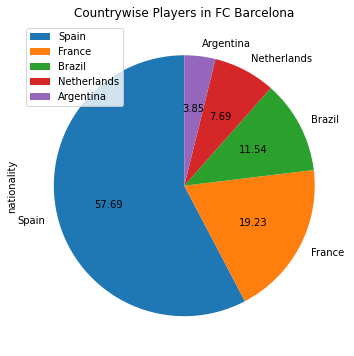

In [68]:
plt.figure(figsize=(10,6))
df[(df['club'] == 'FC Barcelona')]['nationality'].value_counts()[:5].plot(kind='pie', autopct="%1.2f", startangle=90)
plt.title("Countrywise Players in FC Barcelona")
plt.legend()

Pie Plot on player positions

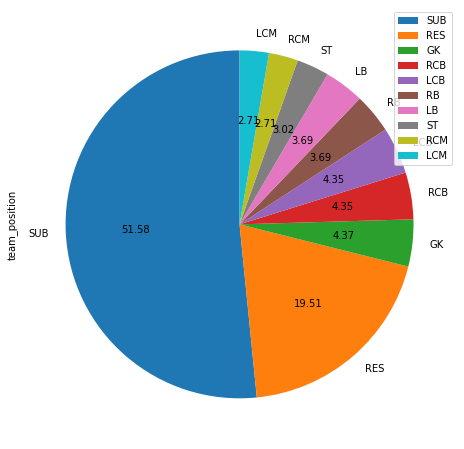

In [133]:

df['team_position'].value_counts()[:10].plot(kind='pie', autopct='%1.2f', figsize=(20,8), startangle=90)
plt.legend()

Top 10 Players With Contracts Expiring In 2021


In [71]:
df[df['contract_valid_until'] == 2021].sort_values(by='overall', ascending=False)[:10]

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,...,94,48,40,94,94,75,96,33,37,26
17,S. Agüero,31,1988-06-02,173,70,Argentina,Manchester City,89,89,60000000,...,84,65,24,93,83,83,90,30,29,24
19,L. Suárez,32,1987-01-24,182,86,Uruguay,FC Barcelona,89,89,53000000,...,86,87,41,92,82,83,85,57,45,38
20,R. Lewandowski,30,1988-08-21,184,80,Poland,FC Bayern München,89,89,64500000,...,84,81,39,91,77,86,86,34,42,19
11,K. Koulibaly,28,1991-06-20,187,89,Senegal,Napoli,89,91,67500000,...,15,87,88,35,52,33,82,91,90,87
24,P. Pogba,26,1993-03-15,191,84,France,Manchester United,88,91,72500000,...,82,78,64,83,88,83,87,63,67,65
30,S. Handanovič,34,1984-07-14,193,92,Slovenia,Inter,88,88,26000000,...,19,25,22,12,41,23,69,25,10,13
31,M. Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,88,88,32000000,...,16,29,30,12,70,47,70,17,10,11
38,P. Aubameyang,30,1989-06-18,187,80,Gabon,Arsenal,88,88,57000000,...,79,43,48,90,77,76,85,27,25,36
52,Thiago,28,1991-04-11,174,70,Spain,FC Bayern München,87,87,50000000,...,79,56,83,79,86,75,87,67,67,71


When are most contracts expiring?

Text(0.5, 1.0, 'Contracts Expiring In')

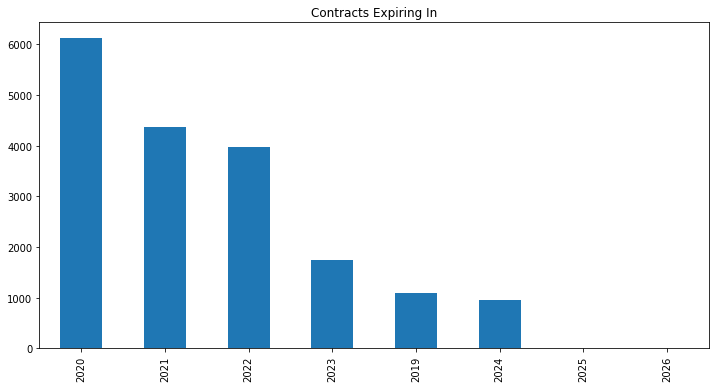

In [80]:
df['contract_valid_until'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title("Contracts Expiring In")

Which country has the most players in top 50 based on overall ratings?

Text(0.5, 1.0, 'Countries With Top Players')

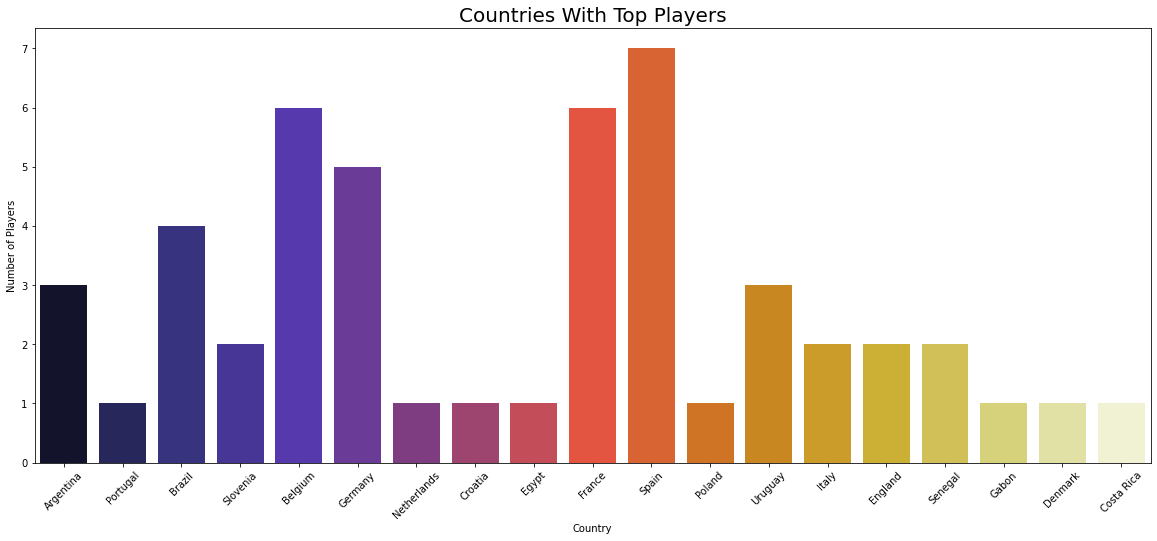

In [106]:
newdf = df.sort_values(by='overall', ascending=False)[:50]

plt.figure(figsize=(20,8))
sns.countplot(x='nationality', data=newdf, palette='CMRmap')
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("Number of Players")
plt.title("Countries With Top Players", fontsize=20)


Which club has the most players in top 50?

Text(0.5, 1.0, 'Clubs With Top Players')

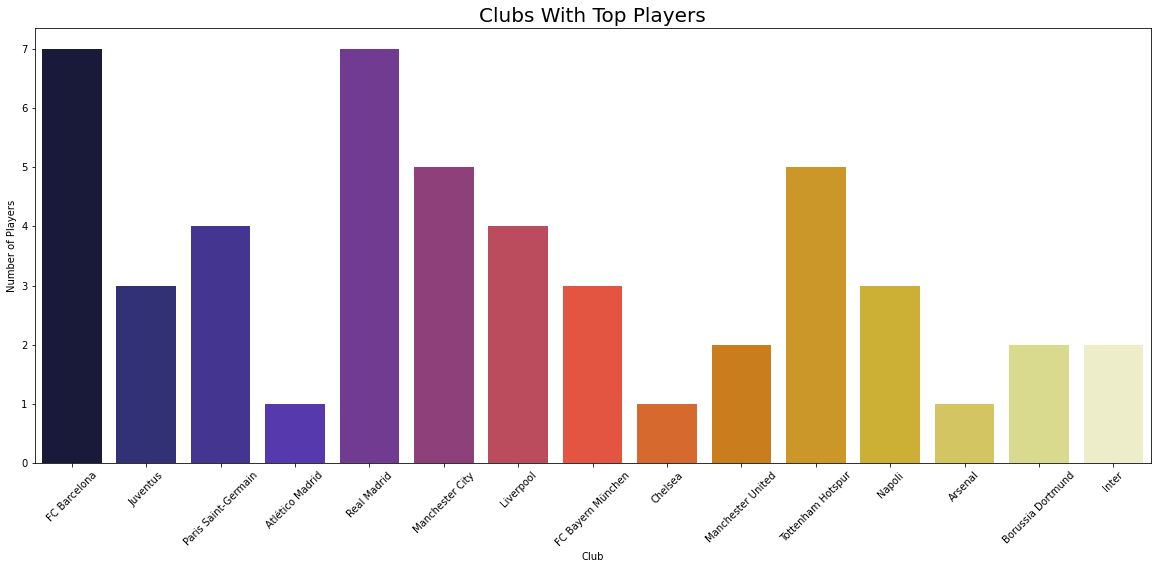

In [105]:
newdf = df.sort_values(by='overall', ascending=False)[:50]

plt.figure(figsize=(20,8))
sns.countplot(x='club', data=newdf, palette='CMRmap')
plt.xlabel("Club")
plt.xticks(rotation=45)
plt.ylabel("Number of Players")
plt.title("Clubs With Top Players", fontsize=20)


Which country has the highest paid players?

Text(0.5, 1.0, 'Countries With Highest Paid Players')

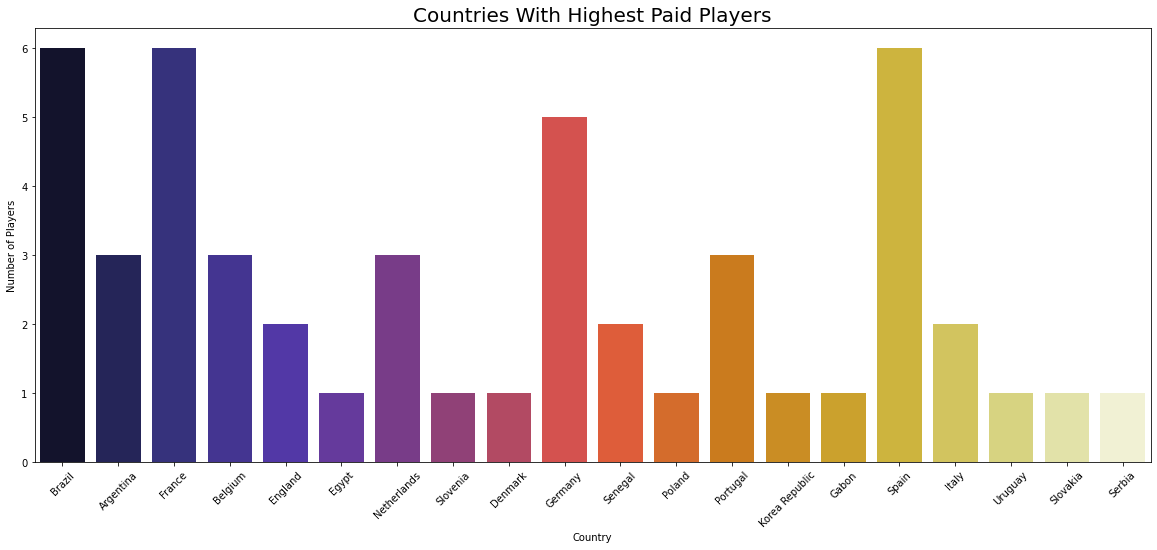

In [104]:
newdf = df.sort_values(by='value_eur', ascending=False)[:50]

plt.figure(figsize=(20,8))
sns.countplot(x='nationality', data=newdf, palette='CMRmap')
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("Number of Players")
plt.title("Countries With Highest Paid Players", fontsize=20)


Which club pays more?

Text(0.5, 1.0, 'Club With Highest Paid Players')

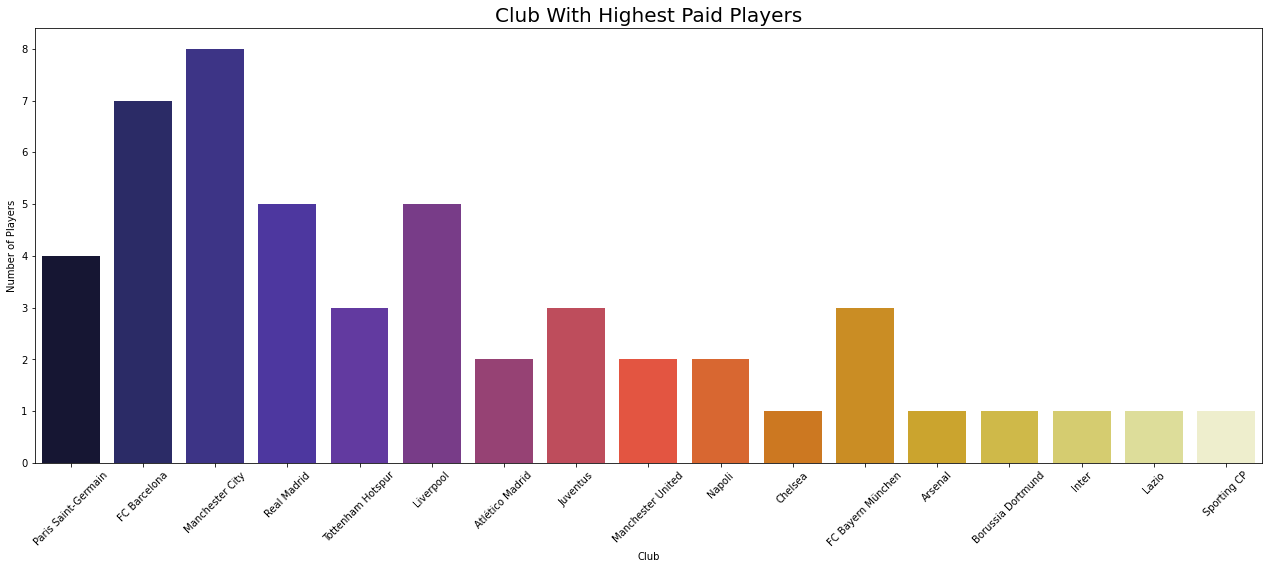

In [103]:
newdf = df.sort_values(by='value_eur', ascending=False)[:50]

plt.figure(figsize=(22,8))
sns.countplot(x='club', data=newdf, palette='CMRmap')
plt.xlabel("Club")
plt.xticks(rotation=45)
plt.ylabel("Number of Players")
plt.title("Club With Highest Paid Players", fontsize=20)

Which type of player comes more in top 50?

Text(0.5, 1.0, 'Top Player Positions')

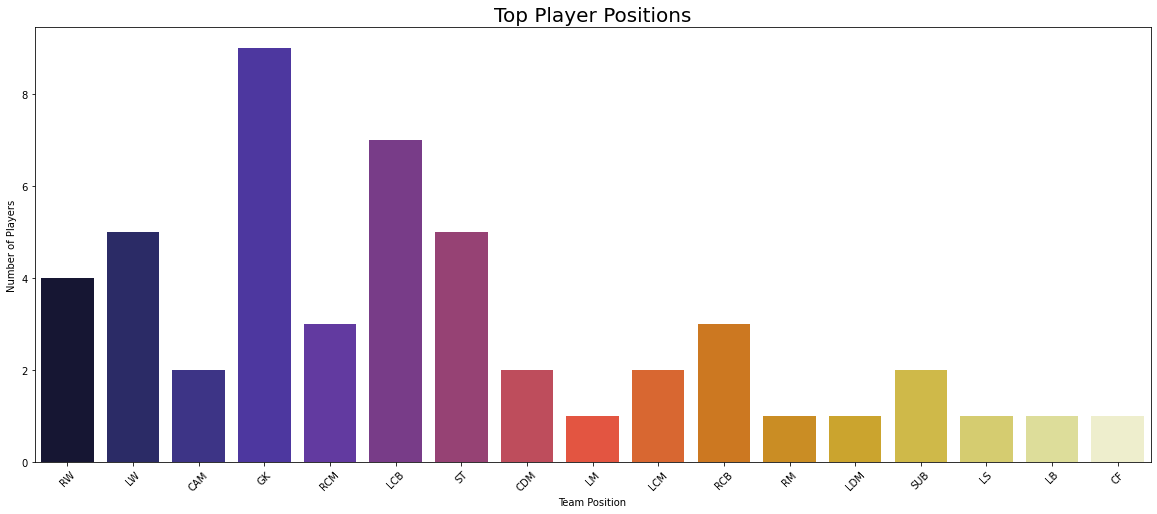

In [108]:
newdf = df.sort_values(by='overall', ascending=False)[:50]

plt.figure(figsize=(20,8))
sns.countplot(x='team_position', data=newdf, palette='CMRmap')
plt.xlabel("Team Position")
plt.xticks(rotation=45)
plt.ylabel("Number of Players")
plt.title("Top Player Positions", fontsize=20)

Which body type is more common in top 50 players?

Text(0.5, 1.0, 'Top Body Types')

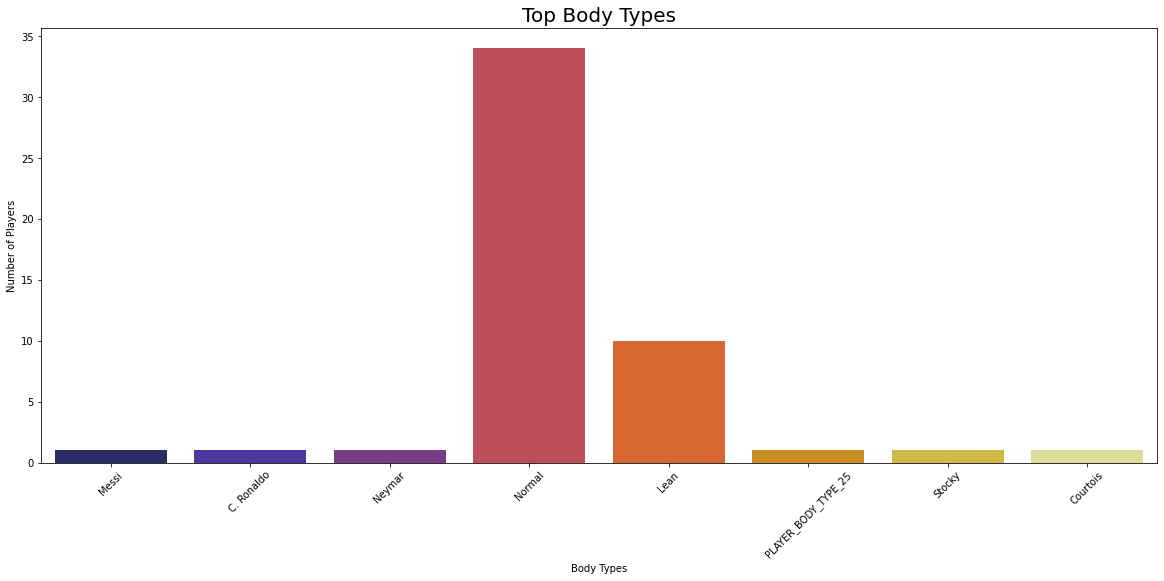

In [117]:
newdf = df.sort_values(by='overall', ascending=False)[:50]

plt.figure(figsize=(20,8))
sns.countplot(x='body_type', data=newdf, palette='CMRmap')
plt.xlabel("Body Types")
plt.xticks(rotation=45)
plt.ylabel("Number of Players")
plt.title("Top Body Types", fontsize=20)

What is the age group in top 50? 

Text(0.5, 1.0, 'Top Ages')

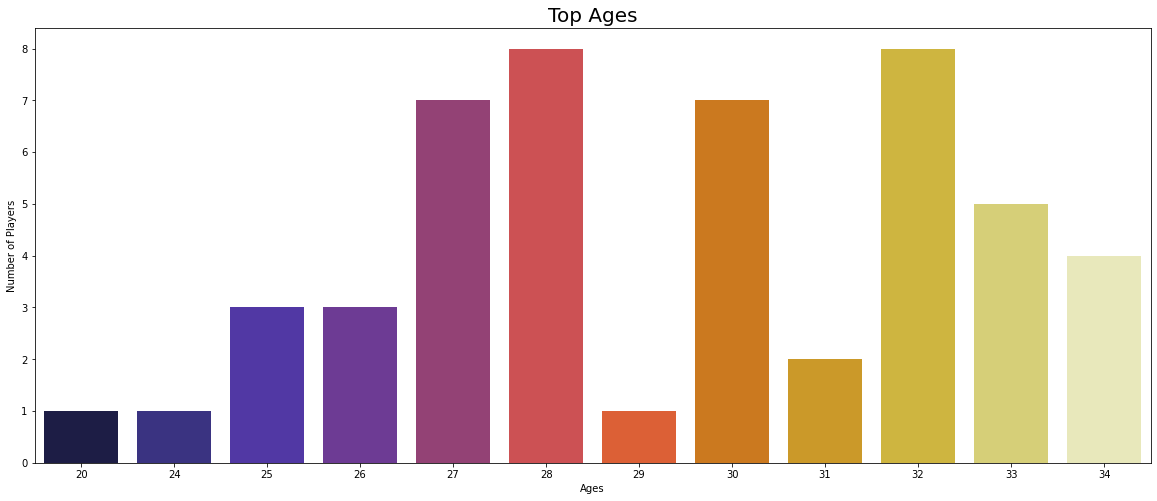

In [119]:
newdf = df.sort_values(by='overall', ascending=False)[:50]

plt.figure(figsize=(20,8))
sns.countplot(x='age', data=newdf, palette='CMRmap')
plt.xlabel("Ages")

plt.ylabel("Number of Players")
plt.title("Top Ages", fontsize=20)

Key Findings/Observations
<ul>
<li>Best player based on overall ratings is Lionel Messi With Rating of 94.</li>
<li>Best player based on Potential ratings is Kylian Mbappe with Rating of 95.</li>
<li>Best defenders are Virgil Van Djik and G. Chiellini with overall rating of 90.</li>
<li>Oldest player is C. Minoz with age 42.</li>
<li>Youngest player is A. Hložek with age 16.</li>
<li>Average Height Of Players:  181.36.</li>
<li>Average Weight Of Players:  75.28.</li>
<li>Most players in the dataset are from England.</li>
<li>FC Barcelona leads with most players in the dataset in club category.</li>
<li>The dataset contains 76.4 right-foot players, and 23.6 left-foot players</li>
<li>Best right foot player is Cristiano Ronaldo</li>
<li>Best right foot defender is V Van Djik</li>
<li>Best right foot GK is J. Oblak</li>
<li>Best left foot player is Lionel Messi</li>
<li>Best left foot defender is G. Chiellini</li>
<li>Best left foot GK is Ederson</li>
<li>As weight increases agility decreases, correlation:  -0.55</li>
<li>As weight increases sprint speed decreases, correlation:  -0.42</li>
<li>As weight increases Dribbling skills decrease, correlation:  -0.27</li>
<li>Weight is helpful in better Defending, correlation:  0.2</li>
<li>Weight decreases pace significantly, Correlation:  -0.35</li>
<li>As per the dataset, most contracts were expiring in 2020, followed by 2021.</li>
<li>Spain tops the list of countries with best overall ratings for players.</li>
<li>There's a close competition between FC Barcelona and Real Madrid in getting top players.</li>
<li>Spanish, Brazilian, and French players are have significantly high values in euros.</li>
<li>Manchester city has the most valued players, followed by FC Barcelona and Real Madrid.</li>
<li>Most High rated players play in GK, LCB, and ST positions.</li>
<li>Normal is the most common body type in top 50 players based on overall ratings</li>
<li>Most top players are between age 28 to 32. So it can be implied that players perform at their peak during this age group.</li>
</ul>